# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [16]:
!pip install ucimlrepo

import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [17]:
data = dataset.data.features
target = dataset.data.targets

nan_indices = np.isnan(data).any(axis=1)

# # # Filter the data and target arrays
data = data[~nan_indices] # Select rows where NaN is not present
target = target[~nan_indices]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(845, 18) (845, 1)
(549, 18) (549, 1) (296, 18) (296, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [18]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
789,90.0,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
305,86.0,45,73,152,63,6,149,44,19,145,170,335,176,71,6,1,189,196
538,101.0,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196
674,92.0,37,80,180,67,8,154,43,19,129,180,353,144,69,6,9,190,195
383,100.0,51,109,224,67,9,217,30,24,162,238,704,206,72,6,18,189,199
393,86.0,47,75,165,68,6,154,43,19,146,176,356,190,74,7,3,188,194
649,89.0,38,77,161,62,7,149,45,19,129,174,327,153,71,6,21,188,193
8,86.0,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208
89,80.0,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184
653,97.0,41,92,197,63,10,179,37,21,140,197,481,136,63,4,3,197,204


Methods `describe` and `info` deliver some useful information.

In [19]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.504554,44.885246,81.952641,168.825137,61.781421,8.595628,168.633880,40.963570,20.575592,148.167577,188.497268,438.211293,174.874317,72.715847,6.391621,12.712204,188.790528,195.499089
std,8.030875,6.167340,15.742150,34.588330,8.544406,4.865383,32.669195,7.756945,2.548118,14.646353,31.060902,173.025891,31.881347,7.617650,4.726228,8.955744,6.111332,7.330972
min,73.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.000000,68.000000,3.000000,6.000000,184.000000,191.000000
50%,93.000000,45.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,578.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,188.000000,320.000000,987.000000,264.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [20]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 789 to 116
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [21]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, X_test)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [22]:
### YOUR CODE HERE
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10]}
grid_search = GridSearchCV(clf, param_grid)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10]})

In [23]:
!pip install scipy==1.11.4

In [38]:
pip install -U scikit-learn

    class
593  saab
101   van
485   bus
504  opel
553   bus
..    ...
326  opel
149   van
260  saab
229  saab
3     van

[296 rows x 1 columns]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

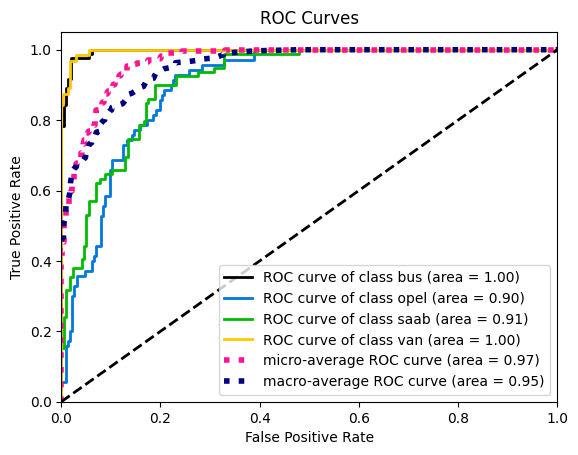

In [46]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score, accuracy_score

y_pred = grid_search.best_estimator_.predict_proba(X_test)
print(y_test)
plot_roc(y_test, y_pred)

In [47]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sklearn_version = sklearn.__version__

print(sklearn_version)

1.5.2


In [49]:
y_pred = grid_search.best_estimator_.predict(X_test) # Predict class labels

print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))


F1 score: 0.7945310623992317
Accuracy: 0.7972972972972973


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

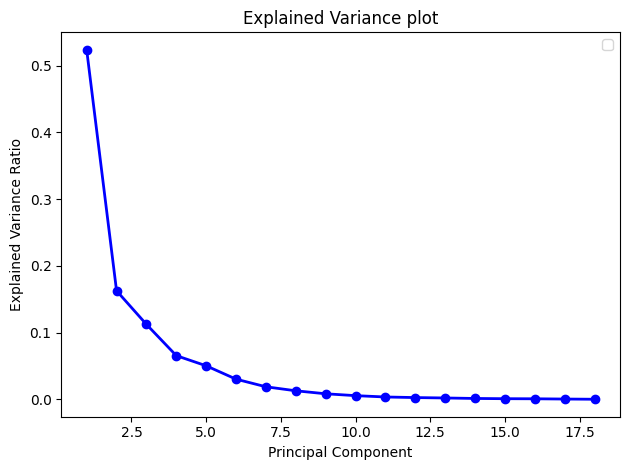

In [50]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
evr = pca.explained_variance_ratio_

plt.plot(range(1,len(evr)+1), evr, 'bo-', linewidth=2)
plt.title("Explained Variance plot")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

we can take as many components as it will be better than 3 $\sigma$ i.e. 99.7%

In [51]:
### YOUR CODE HERE
num_components = [x for x, value in enumerate(np.cumsum(evr)) if value > 0.997][0]
print(r"number of components which gives us more than 3$\sigma$ is", num_components)

new_pca = PCA(num_components)
X_train_new_pca = new_pca.fit_transform(X_train)
X_test_new_pca = new_pca.transform(X_test)

number of components which gives us more than 3$\sigma$ is 13


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [52]:
### YOUR CODE HERE

clf = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(clf, param_grid)

grid_search.fit(X_train_new_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0]})

In [53]:
print(grid_search.best_params_)

{'C': 5.0}


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

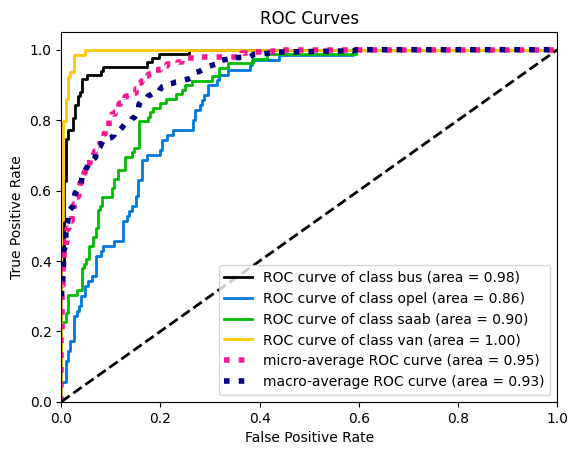

In [54]:
y_pred = grid_search.best_estimator_.predict_proba(X_test_new_pca)
plot_roc(y_test, y_pred)

In [55]:
y_pred = grid_search.best_estimator_.predict(X_test_new_pca)
print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 score: 0.7373763693471161
Accuracy: 0.7364864864864865


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [87]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold

num_splits = 10
skf = StratifiedKFold(n_splits=num_splits, shuffle=True)

f1_score_list_log, f1_score_list_tree, f1_score_list_forest = [], [], []
acc_score_list_log, acc_score_list_tree, acc_score_list_forest = [], [], []

for train_index, test_index in skf.split(X_train_new_pca, y_train):
    X_t = X_train_new_pca[train_index]
    y_t = y_train.iloc[train_index]

    logreg = LogisticRegression(C=1.0, max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
    wood = DecisionTreeClassifier(**wood_params)
    randforest = RandomForestClassifier(**randforest_params)

    logreg.fit(X_t, y_t)
    wood.fit(X_t, y_t)
    randforest.fit(X_t, y_t)

    f1_score_list_log.append(f1_score(y_test, logreg.predict(X_test_new_pca), average='macro'))
    f1_score_list_tree.append(f1_score(y_test, wood.predict(X_test_new_pca), average='macro'))
    f1_score_list_forest.append(f1_score(y_test, randforest.predict(X_test_new_pca), average='macro'))

    acc_score_list_log.append(accuracy_score(y_test, logreg.predict(X_test_new_pca)))
    acc_score_list_tree.append(accuracy_score(y_test, wood.predict(X_test_new_pca)))
    acc_score_list_forest.append(accuracy_score(y_test, randforest.predict(X_test_new_pca)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

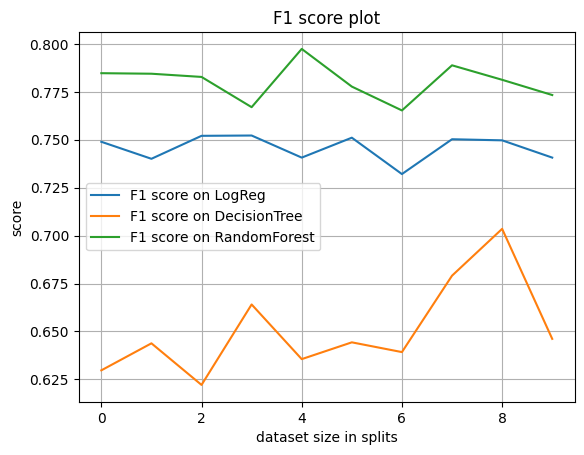

In [88]:
plt.plot(range(num_splits), f1_score_list_log, label="F1 score on LogReg")
plt.plot(range(num_splits), f1_score_list_tree, label="F1 score on DecisionTree")
plt.plot(range(num_splits), f1_score_list_forest, label="F1 score on RandomForest")
plt.xlabel("dataset size in splits")
plt.ylabel("score")
plt.title("F1 score plot")
plt.grid()
plt.legend()
plt.show()

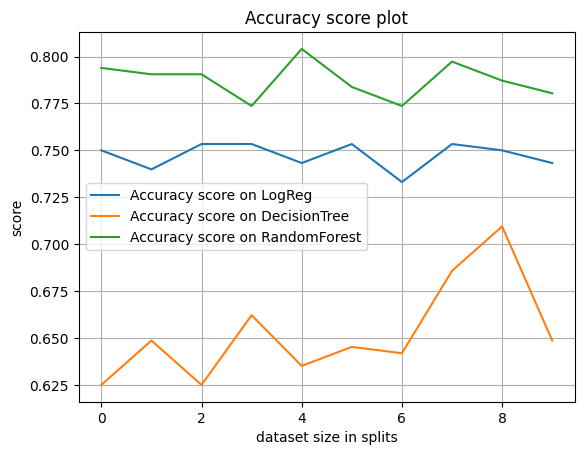

In [89]:
plt.plot(range(num_splits), acc_score_list_log, label="Accuracy score on LogReg")
plt.plot(range(num_splits), acc_score_list_tree, label="Accuracy score on DecisionTree")
plt.plot(range(num_splits), acc_score_list_forest, label="Accuracy score on RandomForest")
plt.xlabel("dataset size in splits")
plt.ylabel("score")
plt.title("Accuracy score plot")
plt.grid()
plt.legend()
plt.show()



*   All three plots have peaks at particular size of dataset and then scores decrease.


